# Implementation of TF-IDF

**Term frequency-inverse document frequency (TF-IDF):** TF-IDF is a commonly used text vectorization technique that represents a document as a vector of the frequency of its constituent words, weighted by the inverse frequency of those words in the entire corpus.

### Purpose of TF-IDF is to highlight words which are frequent in a document but not across the corpus.

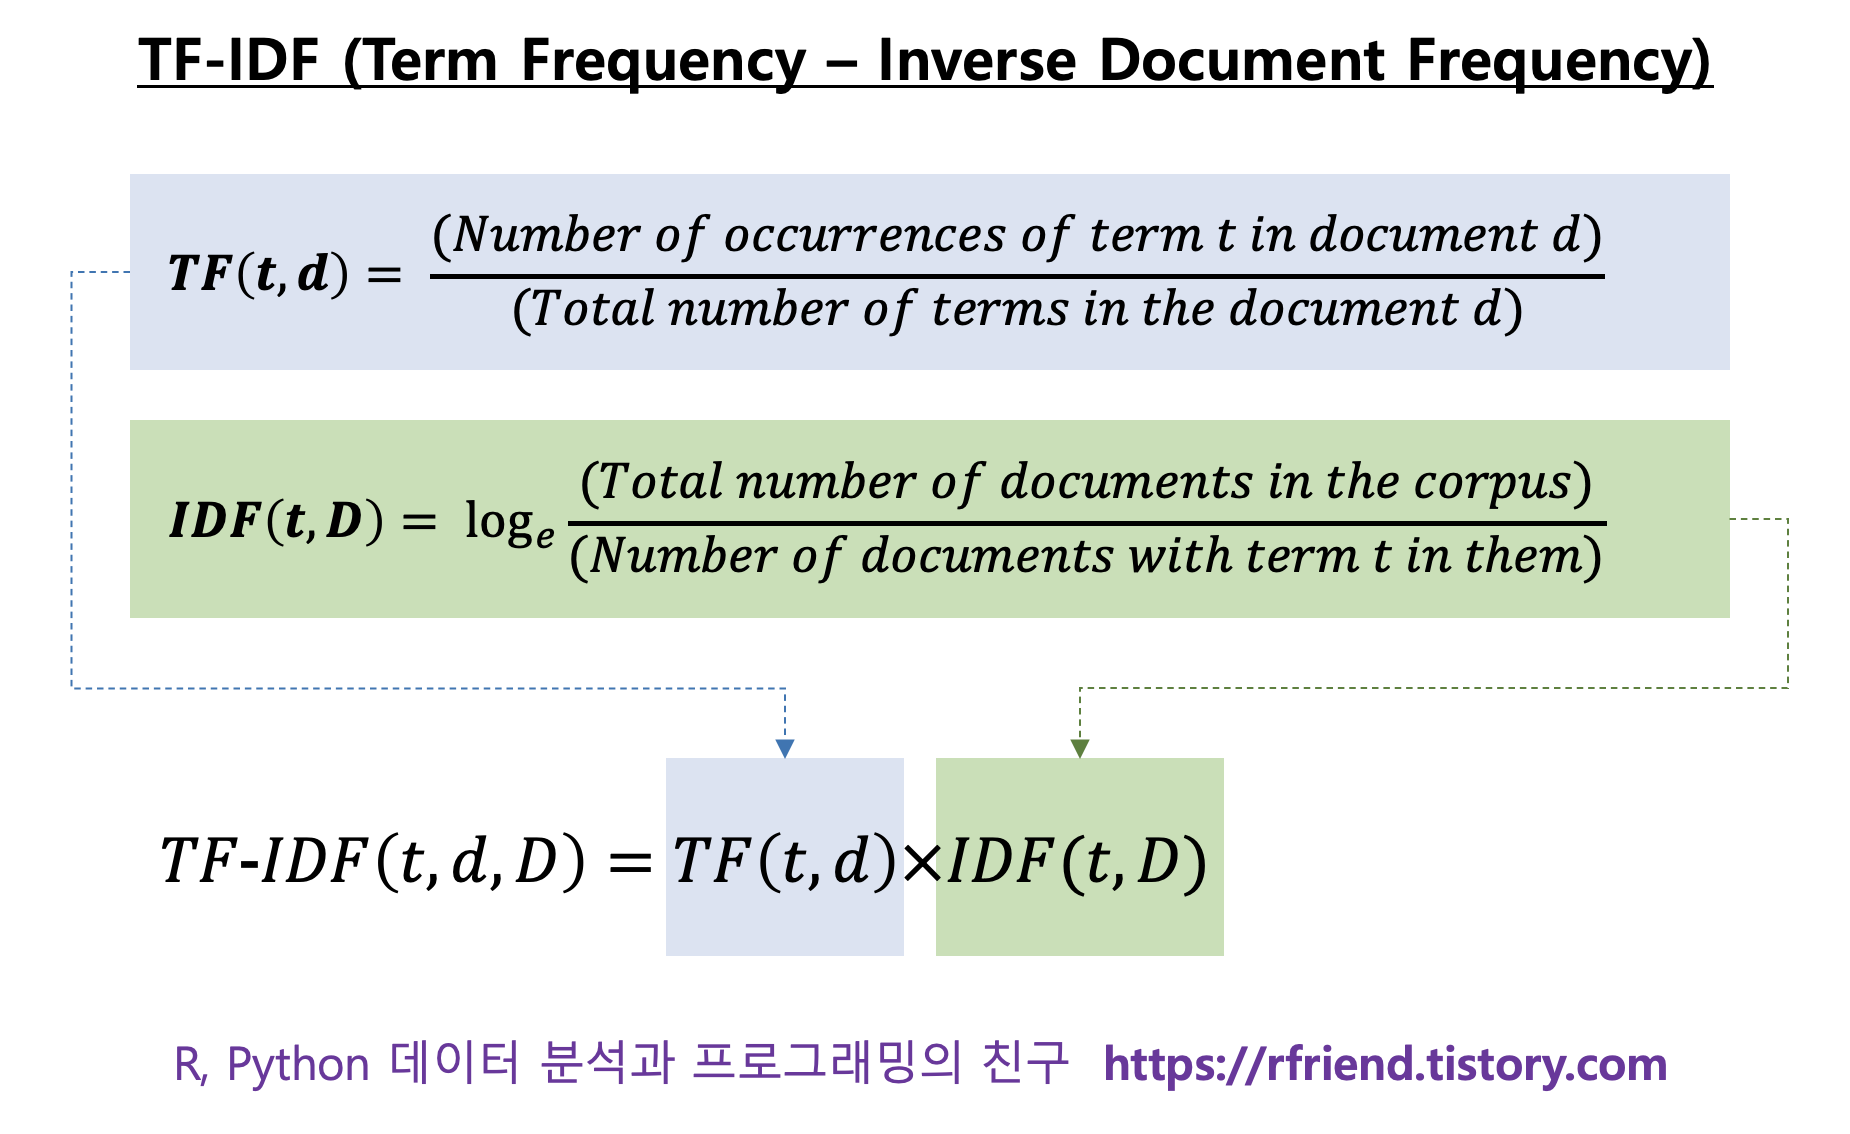

In [26]:
from IPython.display import Image
Image(filename='tfidf.png', width=400, height=100)

In bag of words and grams, equal weight is given to every occurrence of word. However in tf-idf, if a word occurs more frequently in document 1, but rarely occurs in the corpus (or other documents) than that word is important for doc 1, and so it should get more weightage. This is calculated for each word by above formula.

In [42]:
import nltk
import pandas as pd
import numpy as np

# This will help view all the text
pd.set_option('display.max_colwidth', None)

In [30]:
# Load the sample corpus
data = pd.read_csv('tfidf.csv')
data

,documentId,text,category
0,1293,Climate change is a pressing issue that affects us all.,climate
1,1294,"The Earth's temperature is rising due to human activities, such as the burning of fossil fuels and deforestation.",climate
2,1295,"This has led to more extreme weather events, including hurricanes, floods, and droughts.",climate
3,1296,"The consequences of climate change are already being felt around the world, with vulnerable populations, such as the poor and marginalized, bearing the brunt of the impact.",climate
4,1297,It's crucial that we take immediate action to reduce our carbon footprint and mitigate the effects of climate change.,climate
5,1298,"Therefore, climate change is a pressing issue affecting us all.",NaN


In [3]:
# let's count the number of words
num_words = data['text'].str.split().str.len().sum()
print(num_words)

87


All rows together have 87 words

# TF-IDF

In [7]:
# Import Stop Words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [31]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create an oject
tf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)

In [32]:
# Fit and transform the text
matrix = tf.fit_transform(data['text'])

In [33]:
matrix.shape

(6, 41)

In [14]:
tf.get_feature_names()

C:\Users\KANGRSW\Anaconda3\envs\a29env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'activities',
 'affects',
 'bearing',
 'brunt',
 'burning',
 'carbon',
 'change',
 'climate',
 'consequences',
 'crucial',
 'deforestation',
 'droughts',
 'earth',
 'effects',
 'events',
 'extreme',
 'felt',
 'floods',
 'footprint',
 'fossil',
 'fuels',
 'human',
 'hurricanes',
 'immediate',
 'impact',
 'including',
 'issue',
 'led',
 'marginalized',
 'mitigate',
 'poor',
 'populations',
 'pressing',
 'reduce',
 'rising',
 'temperature',
 'vulnerable',
 'weather',
 'world']

### IDF value of a term is common across all documents

In [24]:
tf.idf_

array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 1.40546511, 1.40546511, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229])

In [23]:
# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(tf.get_feature_names(), tf.idf_))

for word, score in word2tfidf.items():
    print(word, score)


action 2.09861228866811
activities 2.09861228866811
affects 2.09861228866811
bearing 2.09861228866811
brunt 2.09861228866811
burning 2.09861228866811
carbon 2.09861228866811
change 1.4054651081081644
climate 1.4054651081081644
consequences 2.09861228866811
crucial 2.09861228866811
deforestation 2.09861228866811
droughts 2.09861228866811
earth 2.09861228866811
effects 2.09861228866811
events 2.09861228866811
extreme 2.09861228866811
felt 2.09861228866811
floods 2.09861228866811
footprint 2.09861228866811
fossil 2.09861228866811
fuels 2.09861228866811
human 2.09861228866811
hurricanes 2.09861228866811
immediate 2.09861228866811
impact 2.09861228866811
including 2.09861228866811
issue 2.09861228866811
led 2.09861228866811
marginalized 2.09861228866811
mitigate 2.09861228866811
poor 2.09861228866811
populations 2.09861228866811
pressing 2.09861228866811
reduce 2.09861228866811
rising 2.09861228866811
temperature 2.09861228866811
vulnerable 2.09861228866811
weather 2.09861228866811
world 2.

C:\Users\KANGRSW\Anaconda3\envs\a29env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


By default, `TfidfVectorizer` normalizes numbers (default norm argument) after multiplying the **tf** and **idf**. Hence we cannot get the term frequency.

## Final TF-IDF score


Each row in this 2D array refers to a document, and each element in the row refers to the TF-IDF score of the corresponding word

In [27]:
print(tf.vocabulary_)

{'climate': 8, 'change': 7, 'pressing': 33, 'issue': 27, 'affects': 2, 'earth': 13, 'temperature': 36, 'rising': 35, 'human': 22, 'activities': 1, 'burning': 5, 'fossil': 20, 'fuels': 21, 'deforestation': 11, 'led': 28, 'extreme': 16, 'weather': 38, 'events': 15, 'including': 26, 'hurricanes': 23, 'floods': 18, 'droughts': 12, 'consequences': 9, 'felt': 17, 'world': 39, 'vulnerable': 37, 'populations': 32, 'poor': 31, 'marginalized': 29, 'bearing': 3, 'brunt': 4, 'impact': 25, 'crucial': 10, 'immediate': 24, 'action': 0, 'reduce': 34, 'carbon': 6, 'footprint': 19, 'mitigate': 30, 'effects': 14}


In [26]:
# let's print the sparse matrix
matrix.toarray()

array([[0.        , 0.        , 0.50656277, 0.        , 0.        ,
        0.        , 0.        , 0.33925099, 0.33925099, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.50656277, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50656277, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

#### Remeber TF-IDF score is per word per document.

# Text Classification

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
similarity_matrix = cosine_similarity(matrix[0], matrix)
similarity_matrix

array([[1.        , 0.        , 0.        , 0.12322136, 0.13664697,
        0.67199777]])